### Exercise 2: Verlet Algorithm

stepsize = 3600.0
(i)


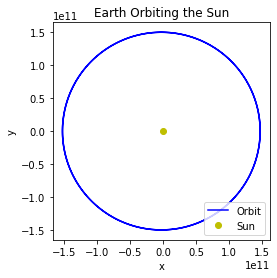

(ii)


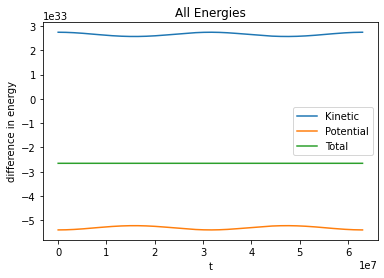

(iii)


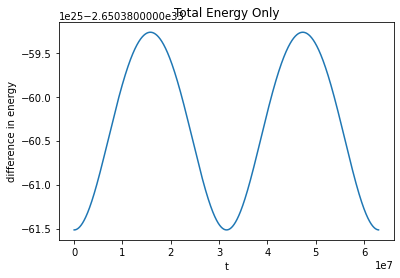

In [1]:
#(i)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  

def acceleration(x, y):
    x = r[0]
    y = r[1]
    a = ((x**2)+(y**2))**0.5
    return np.array([-(alphasqr)*(x/(a**3)), -(alphasqr)*(y/(a**3))])

def energy(r):  
    x = r[0]
    y = r[1]
    xvel = r[2]
    yvel = r[3]
    T = m * (xvel**2+yvel**2) / 2
    U = -alphasqr * m / ((x**2 + y**2))**0.5
    return np.array([T, U, T + U])

start = 0.0
end = 63e6 #number of seconds in two revolutions around the sun
numSteps = 17500
stepSize = (end-start)/numSteps #makes time step one hour
print('stepsize =', stepSize)
# physical and system constants
G = 6.6738e-11 #Gravitational Constant (Nm^2/kg^2)
M = 1.9891e30 #Mass of the Sun (kg)
m = 5.9722e24 #Mass of the Earth (kg)
alphasqr = G * M

peri = 1.4710e11 #perihelion distance (m)
vel = 3.0287e4 #perihelion velocity (m/s)

tpoints = np.arange(start,end,stepSize)

xpts = []
ypts = []
xvelpts = []
yvelpts = []
energypts = []
total_energy_pts = []

# initial conditions for acceleration and velocity; summarized in vector r
r = np.array([peri, 0, 0, vel], float)   
current_accel = acceleration(r[0], r[1])

for t in tpoints:
    xpts.append(r[0])
    ypts.append(r[1])
    xvelpts.append(r[2])
    yvelpts.append(r[3])
    energypts.append(energy(r))
    total_energy_pts.append(energy(r)[2])

    r[2] += current_accel[0]*stepSize/2 # update x-velocity
    r[3] += current_accel[1]*stepSize/2 # update y-velocity
    r[0] += r[2]*stepSize # update x coordinate using x-velocity
    r[1] += r[3]*stepSize # same for y coordinate
    current_accel = acceleration(r[0],r[1]) # update acceleration using x and y coords
    r[2] += current_accel[0]*stepSize/2 # updating velocities again
    r[3] += current_accel[1]*stepSize/2
    
# plot results
print('(i)')
plt.plot(xpts, ypts, 'b-', label = 'Orbit')
plt.plot(0, 0, 'yo', label = 'Sun')
plt.title('Earth Orbiting the Sun')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

#(ii)
print('(ii)')
plt.plot(tpoints, energypts, label = ('Kinetic', 'Potential', 'Total'))
plt.title('All Energies')
plt.ylabel('difference in energy')
plt.xlabel('t')
plt.legend(loc = 'best')
plt.show()

#(iii)
print('(iii)')
plt.plot(tpoints, total_energy_pts)
plt.ylabel('difference in energy')
plt.xlabel('t')
plt.title('Total Energy Only')
plt.show()